In [7]:
!pip install opencv-python

import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import drive
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from PIL import Image
from PIL import ImageDraw
import cv2
from google.colab.patches import cv2_imshow


drive.mount('/content/drive')

#데이터 zip파일 불러오기
!unzip -o "/content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/DataSet/Dataset.zip" -d "/content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/DataSet/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/DataSet/Dataset.zip
  inflating: /content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/DataSet/Dataset/.DS_Store  
  inflating: /content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/DataSet/Dataset/o_1.png  
  inflating: /content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/DataSet/Dataset/o_10.png  
  inflating: /content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/DataSet/Dataset/o_100.png  
  inflating: /content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/DataSet/Dataset/o_101.jpg  
  inflating: /content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/DataSet/Dataset/o_102.jpg  
  inflating: /content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/DataSet/Dataset/o_103.jpg  
  inflating: /content/drive/MyDrive/인공지ᄂ

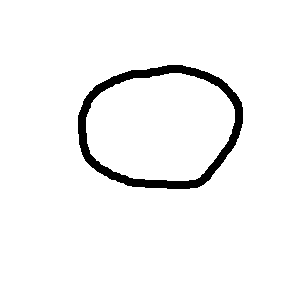

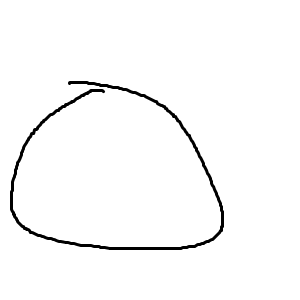

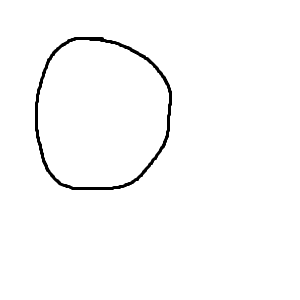

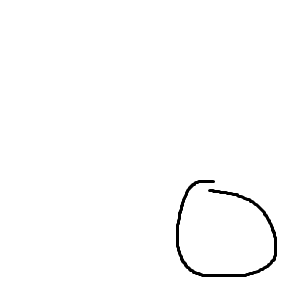

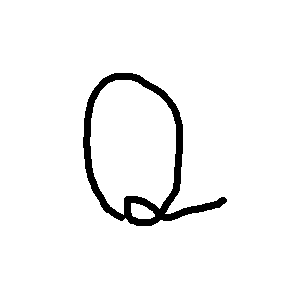

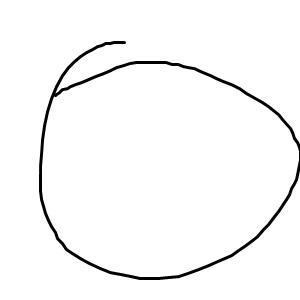

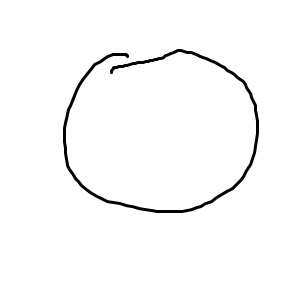

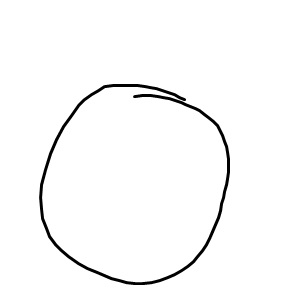

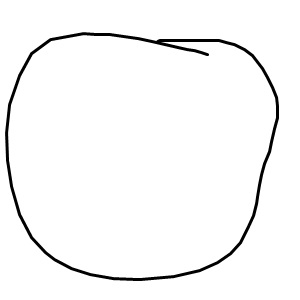

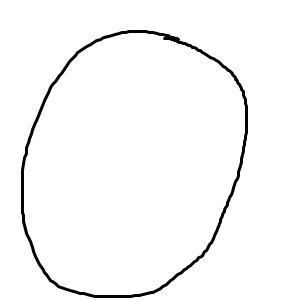

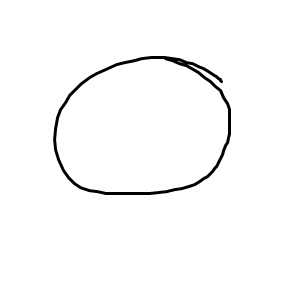

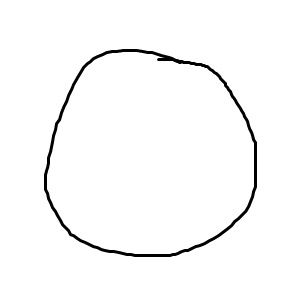

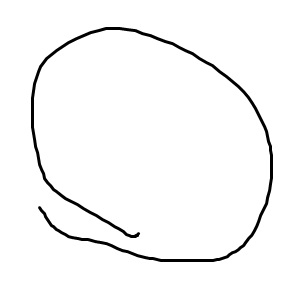

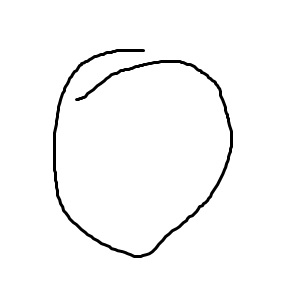

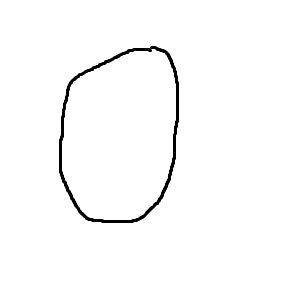

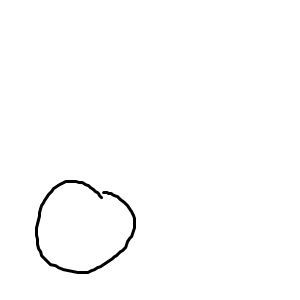

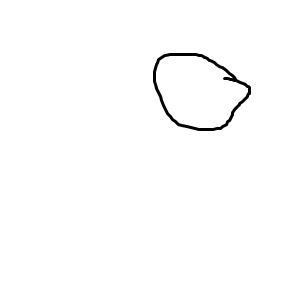

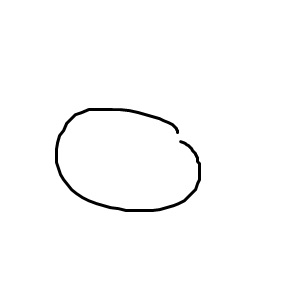

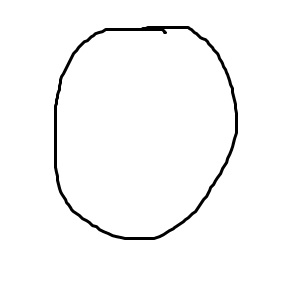

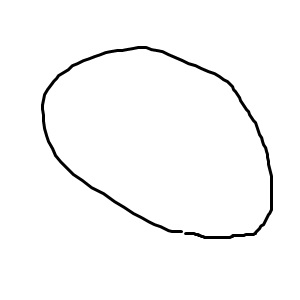

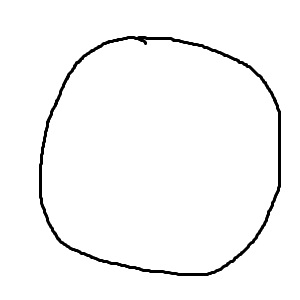

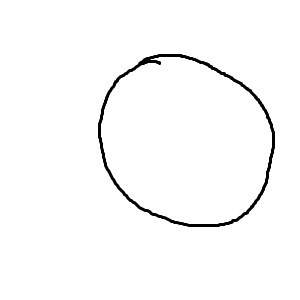

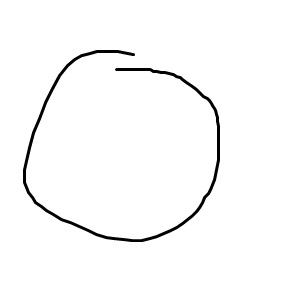

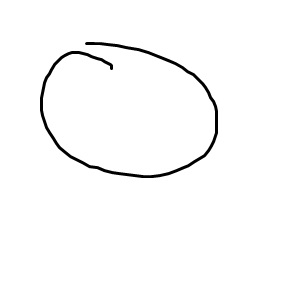

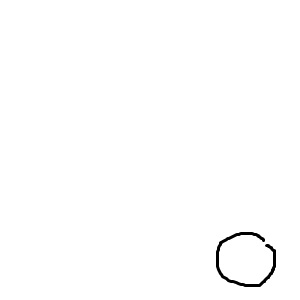

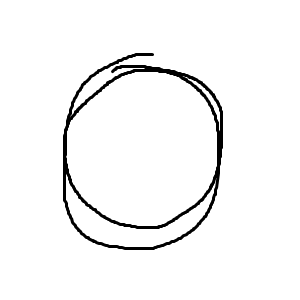

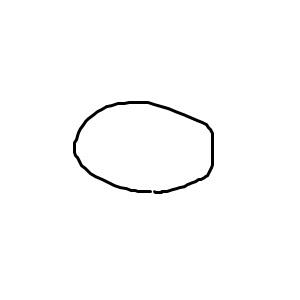

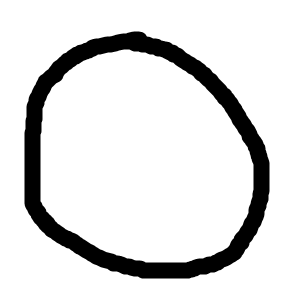

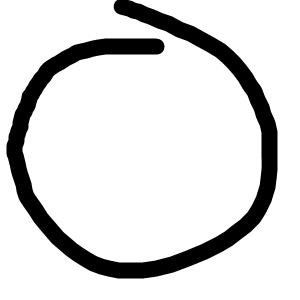

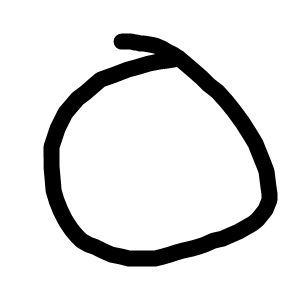

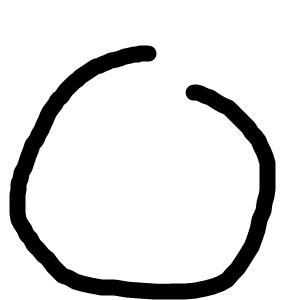

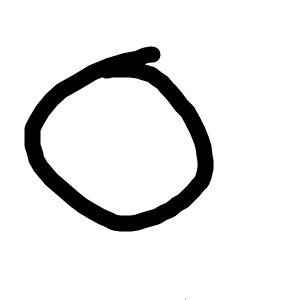

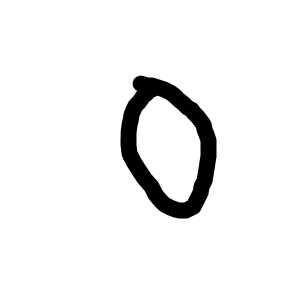

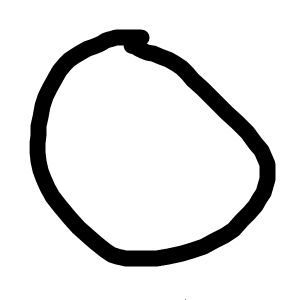

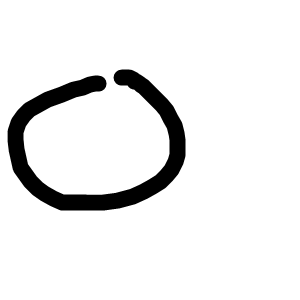

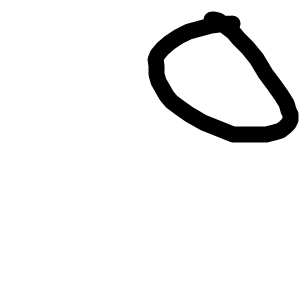

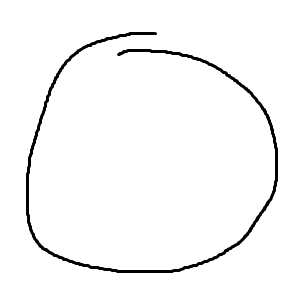

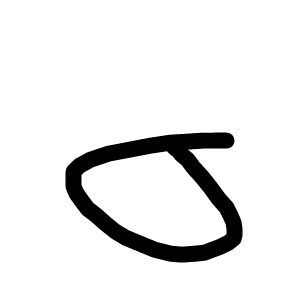

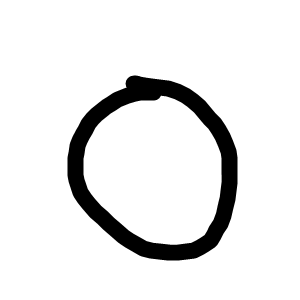

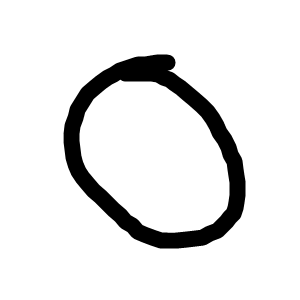

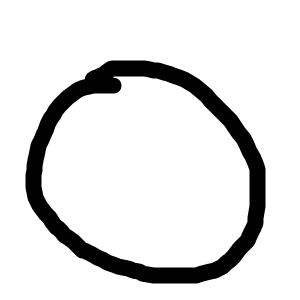

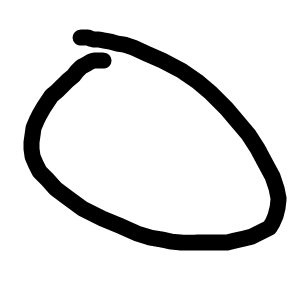

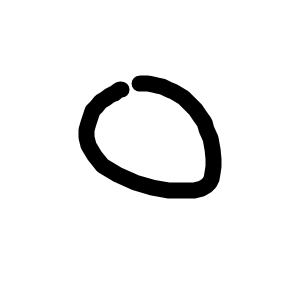

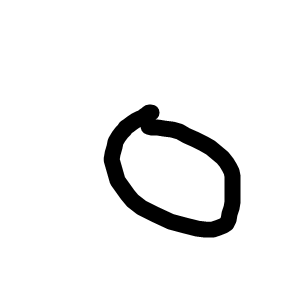

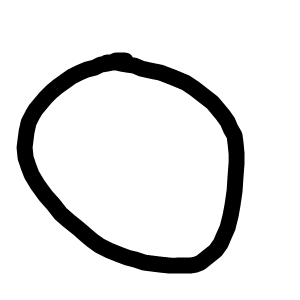

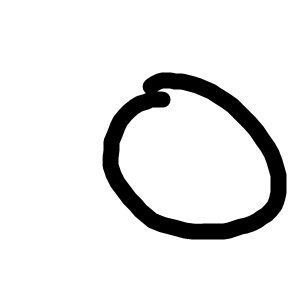

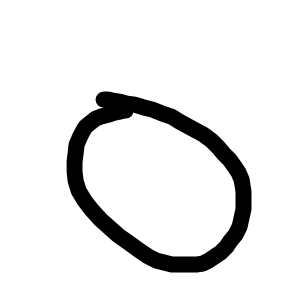

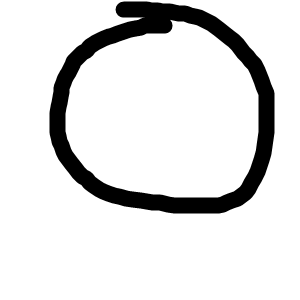

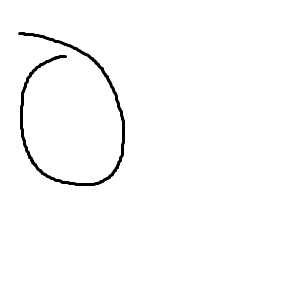

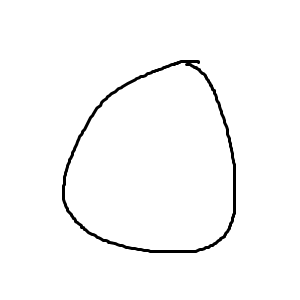

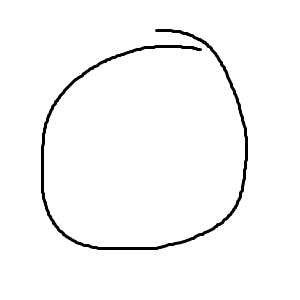

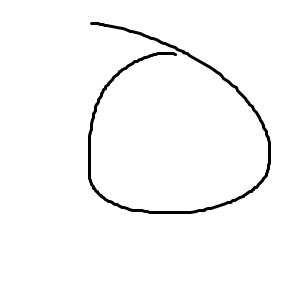

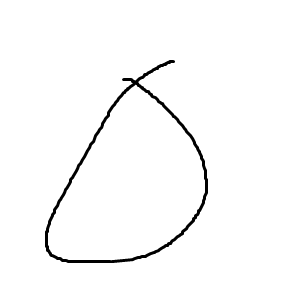

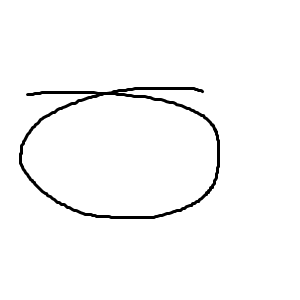

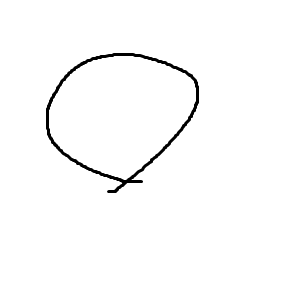

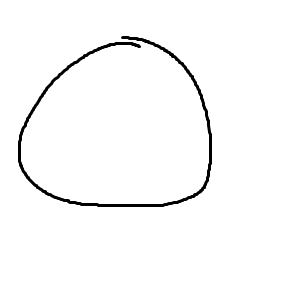

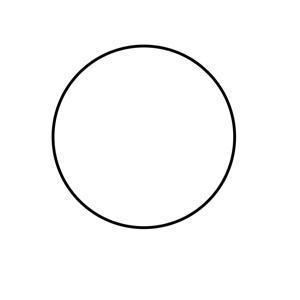

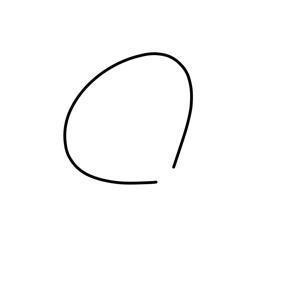

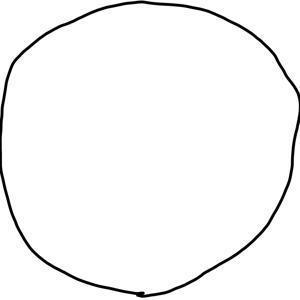

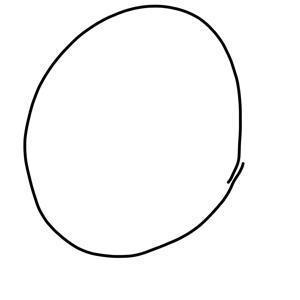

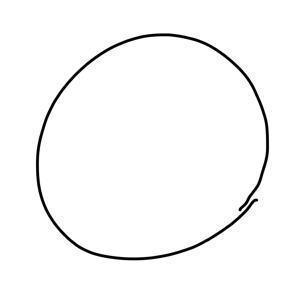

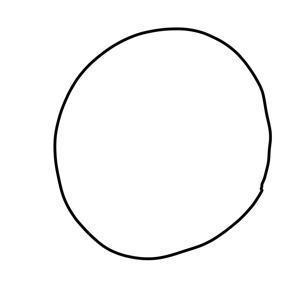

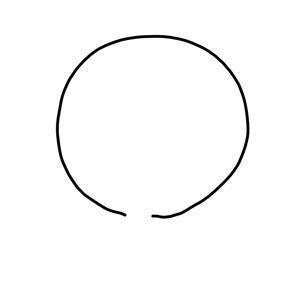

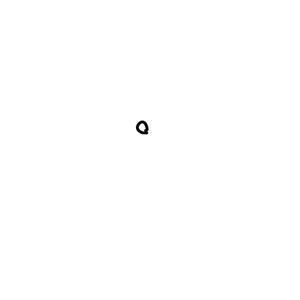

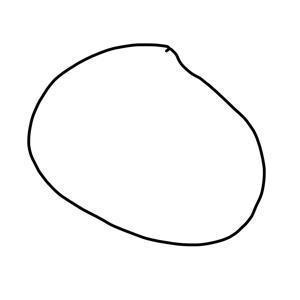

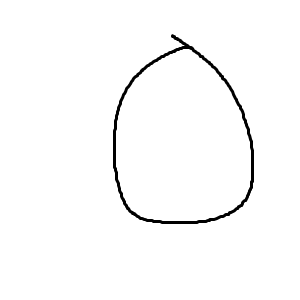

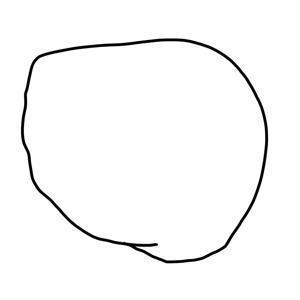

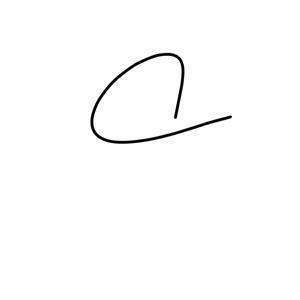

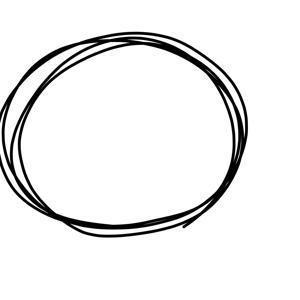

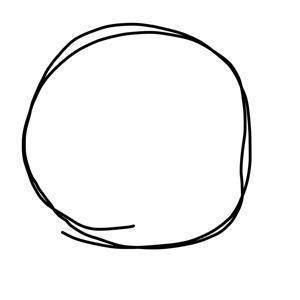

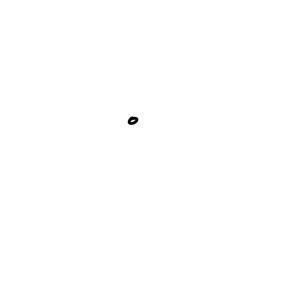

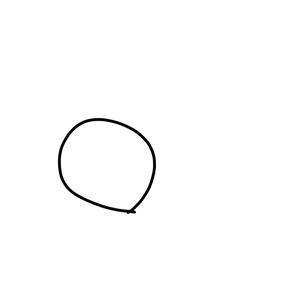

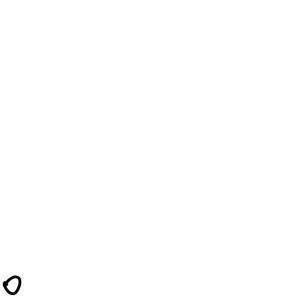

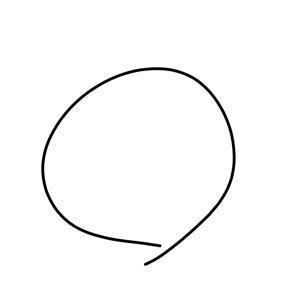

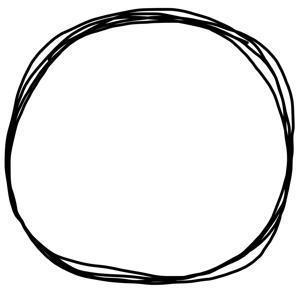

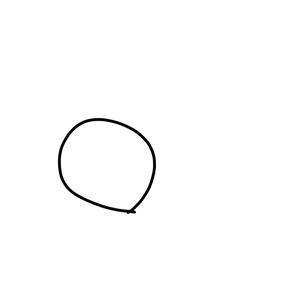

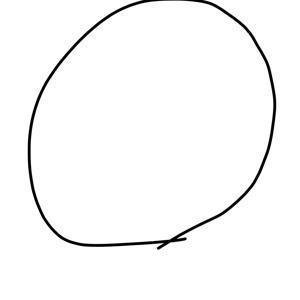

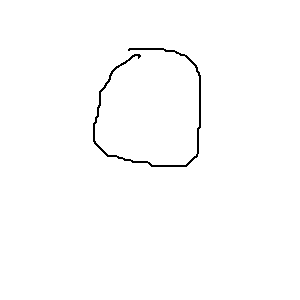

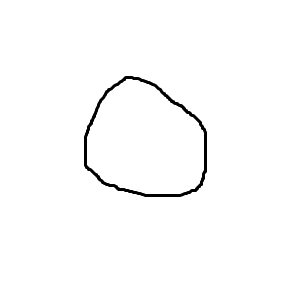

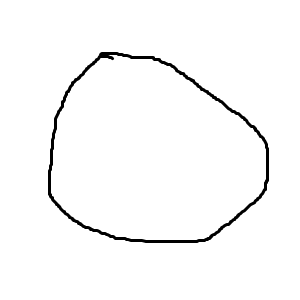

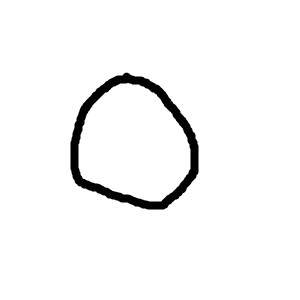

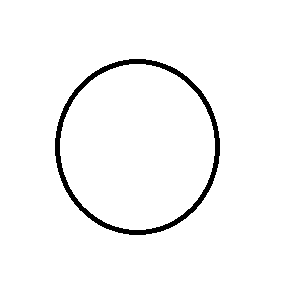

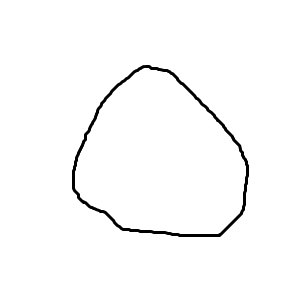

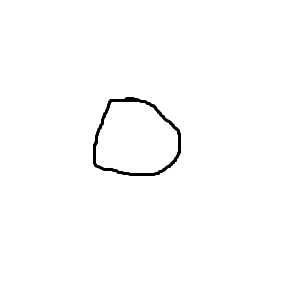

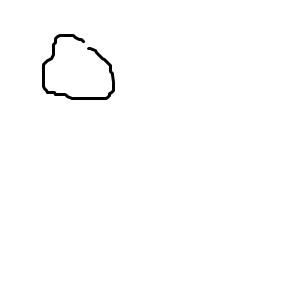

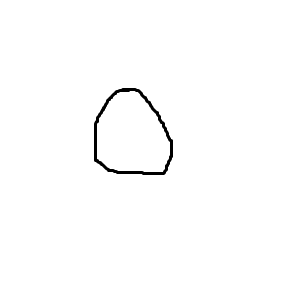

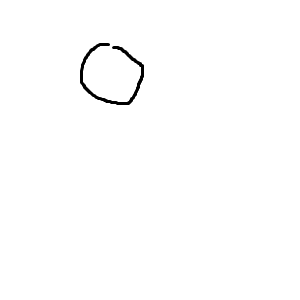

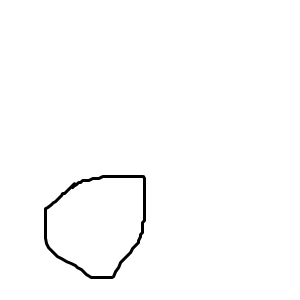

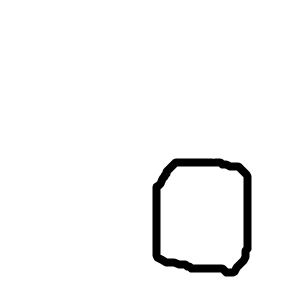

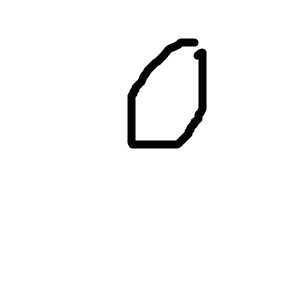

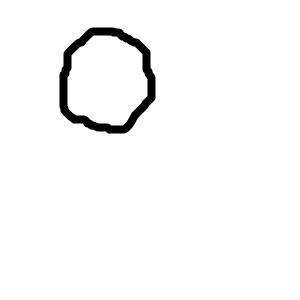

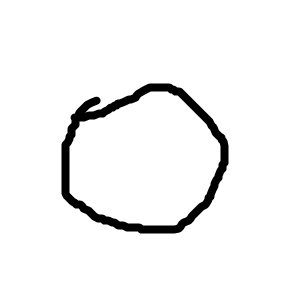

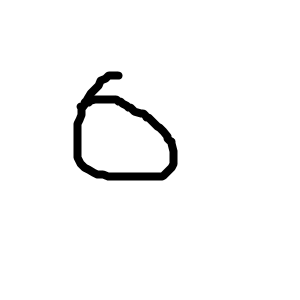

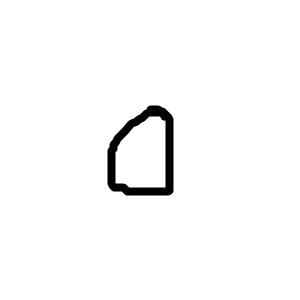

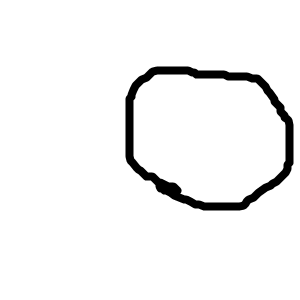

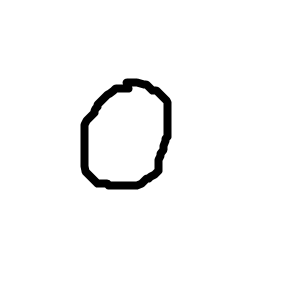

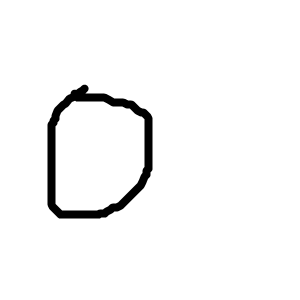

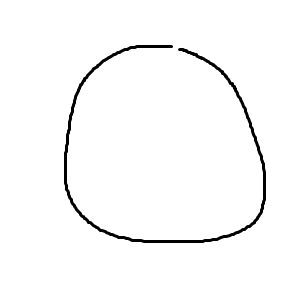

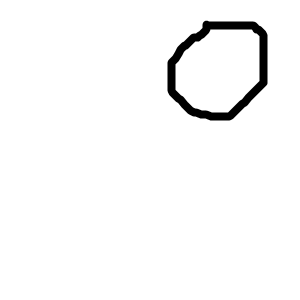

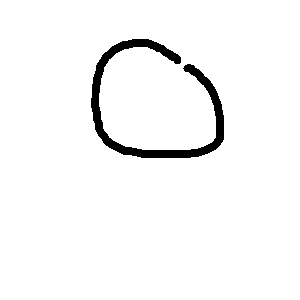

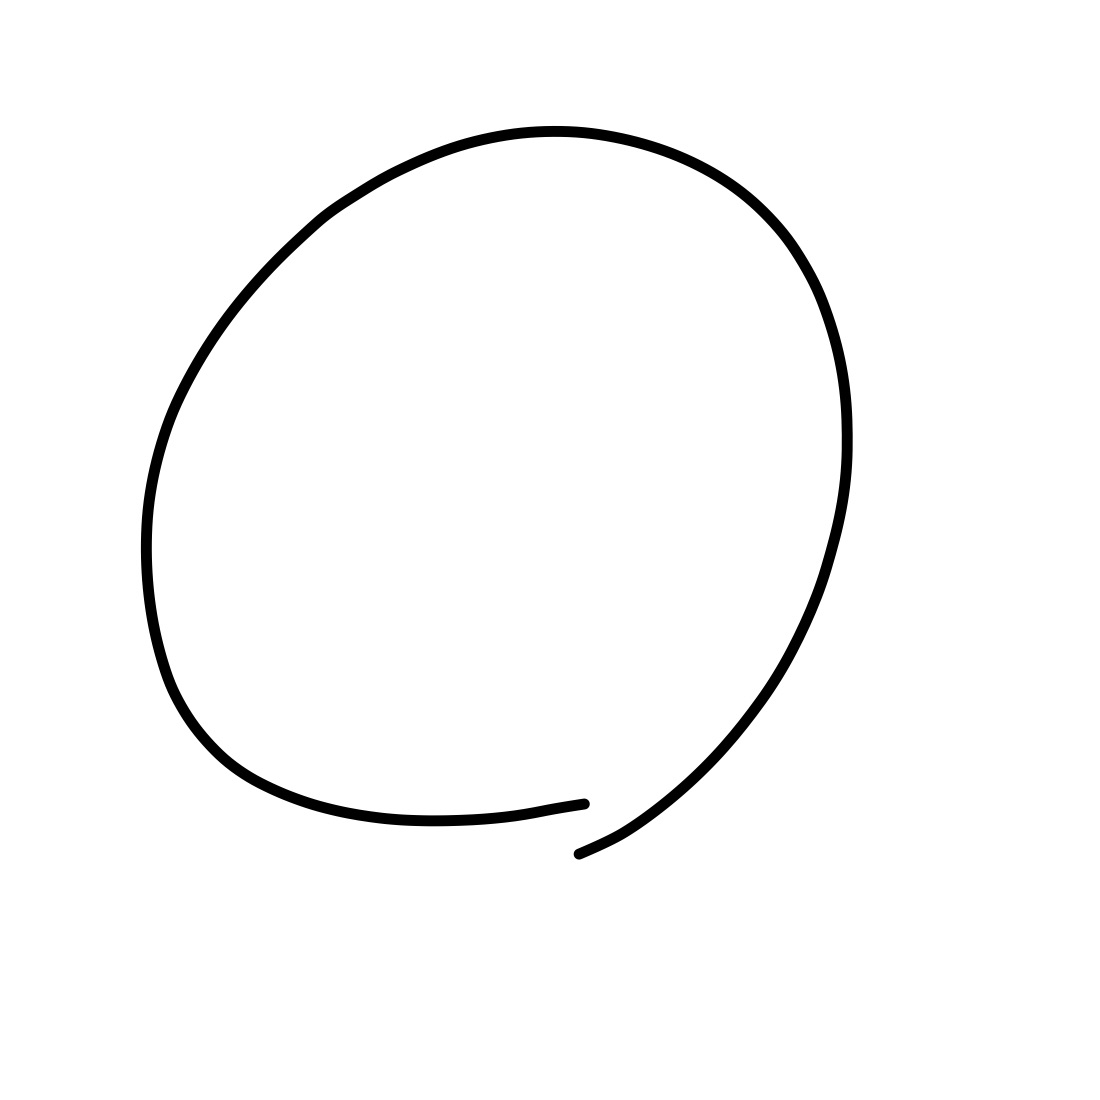

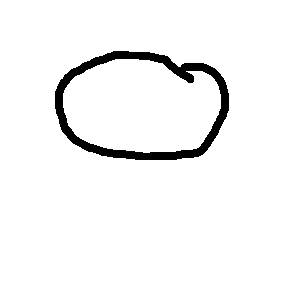

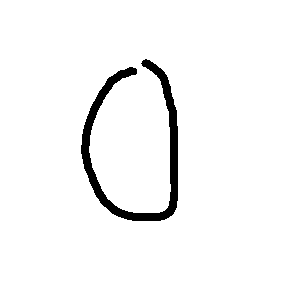

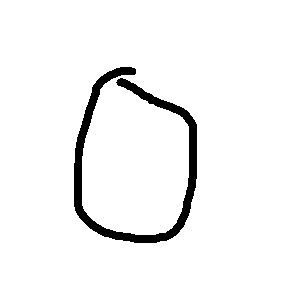

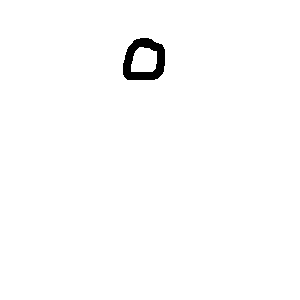

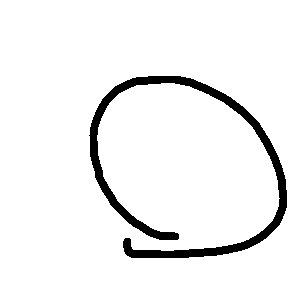

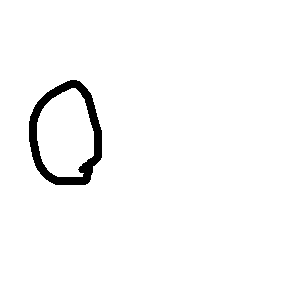

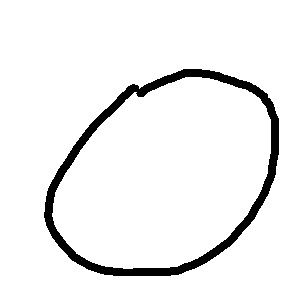

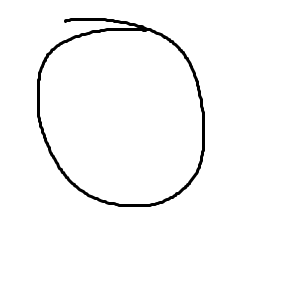

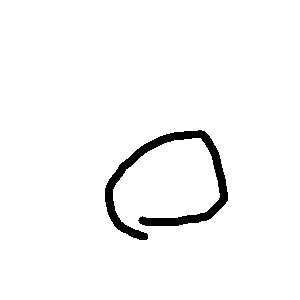

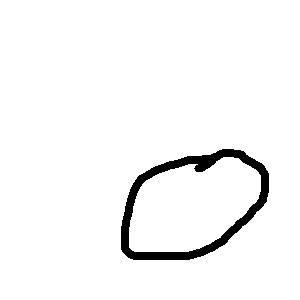

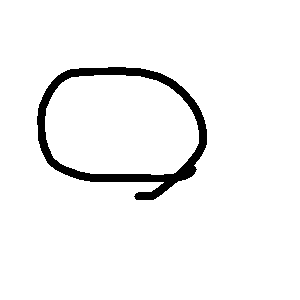

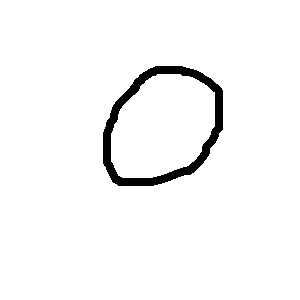

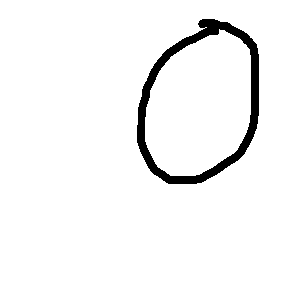

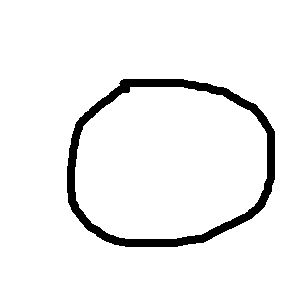

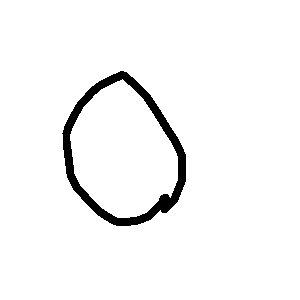

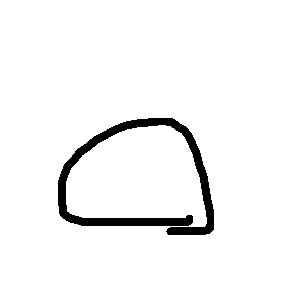

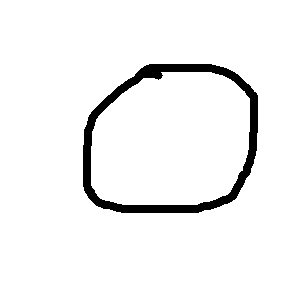

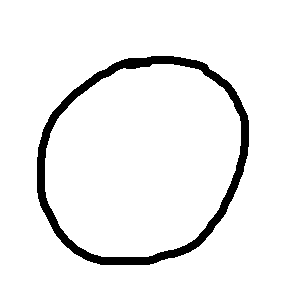

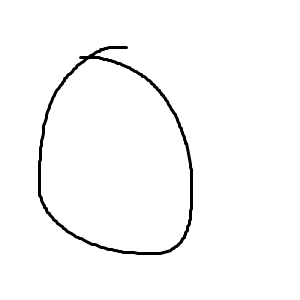

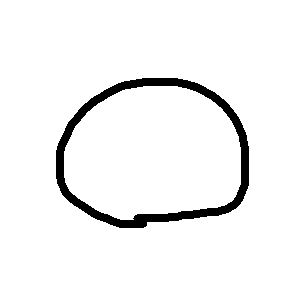

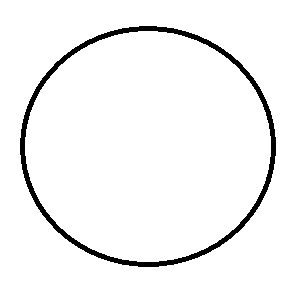

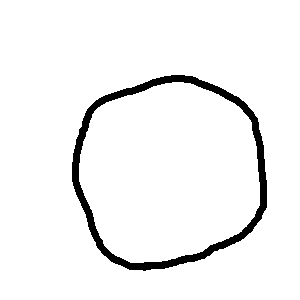

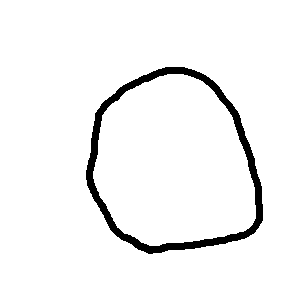

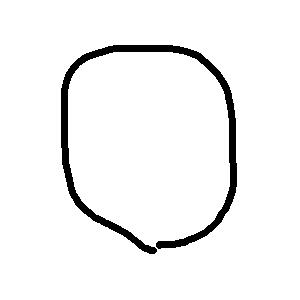

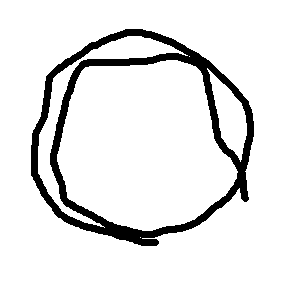

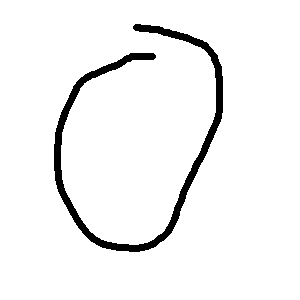

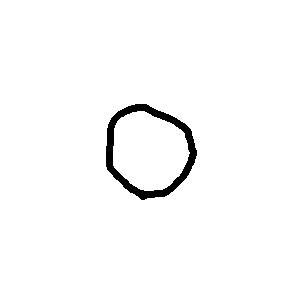

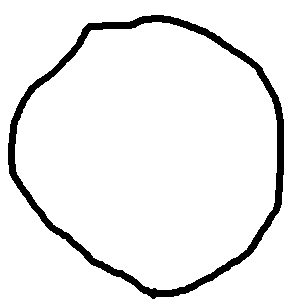

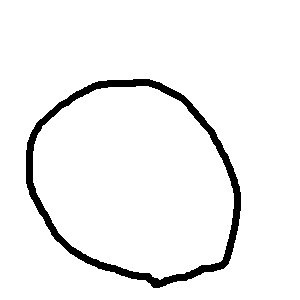

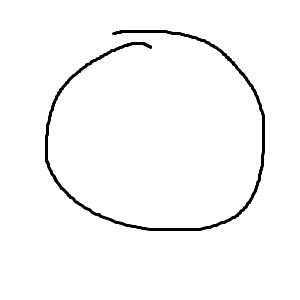

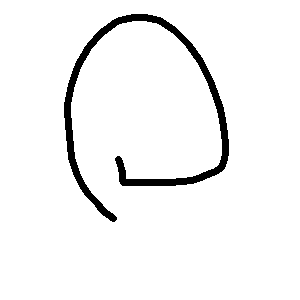

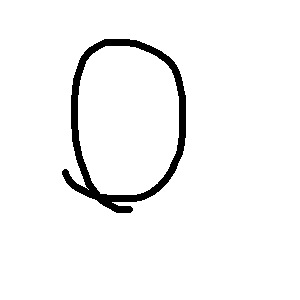

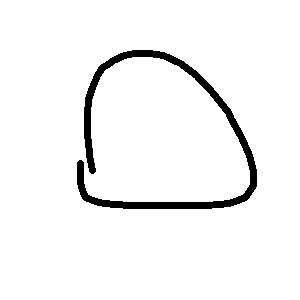

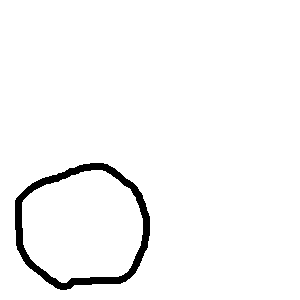

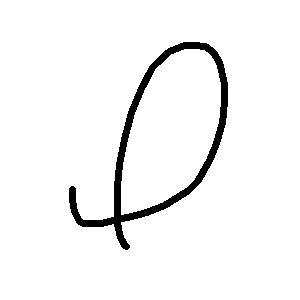

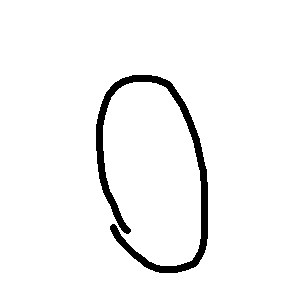

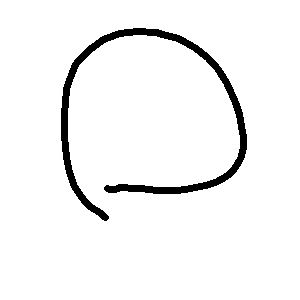

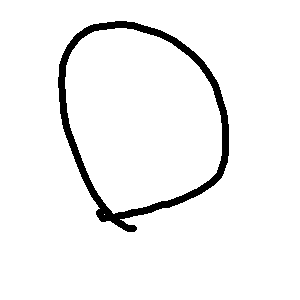

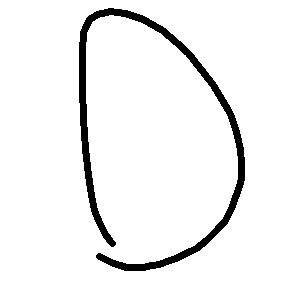

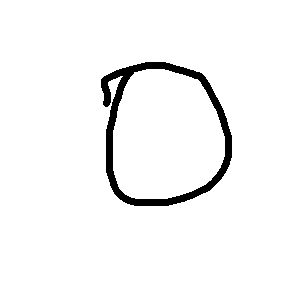

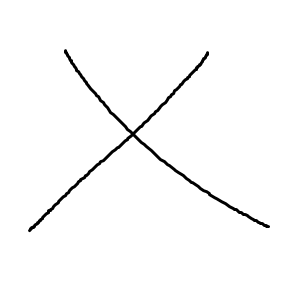

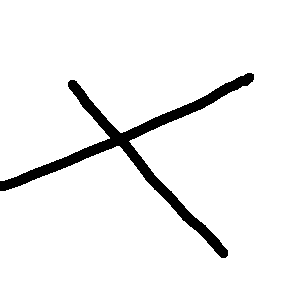

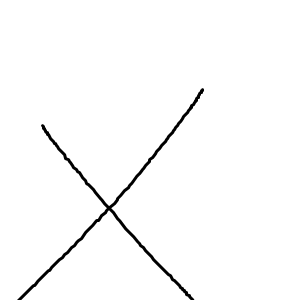

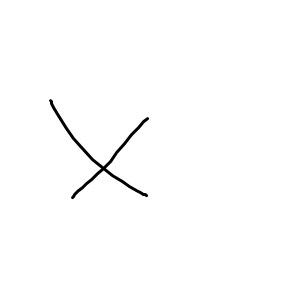

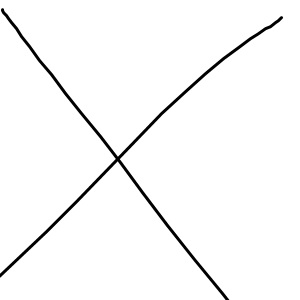

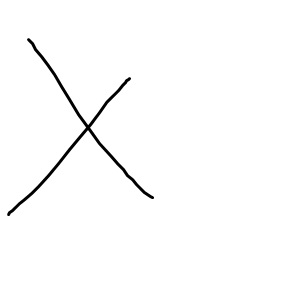

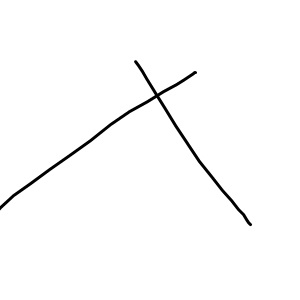

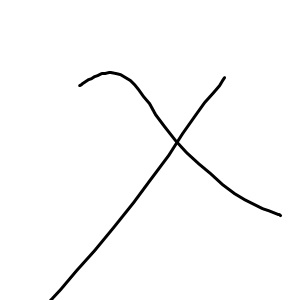

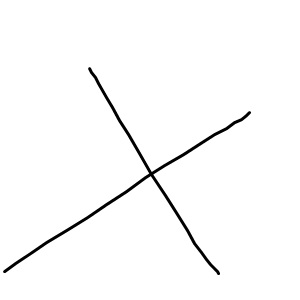

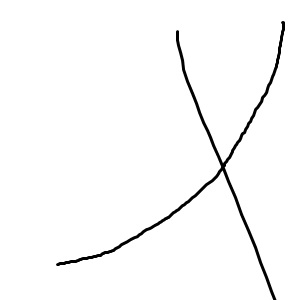

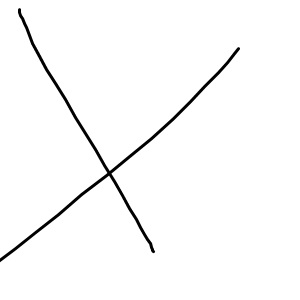

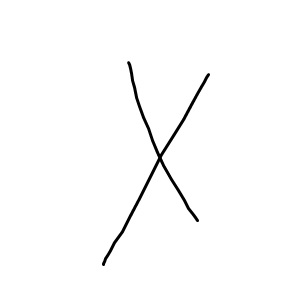

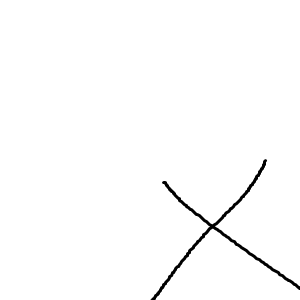

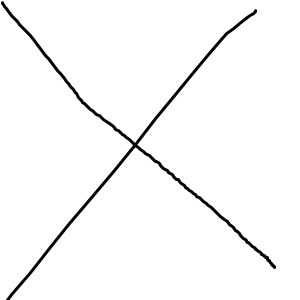

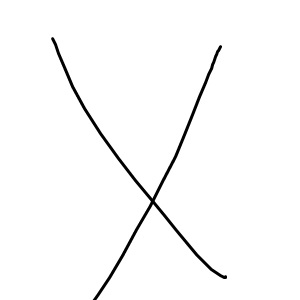

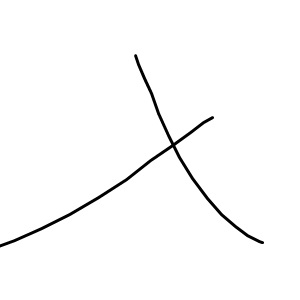

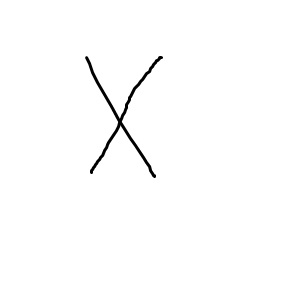

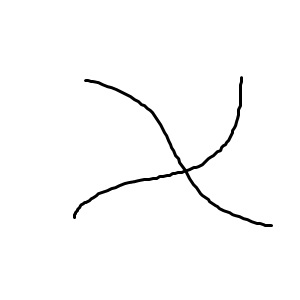

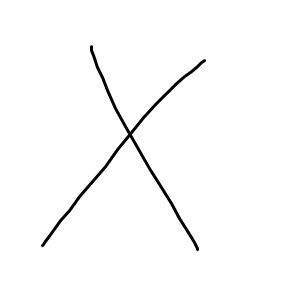

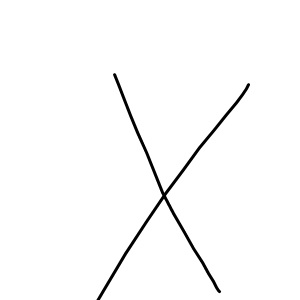

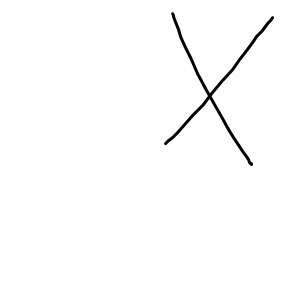

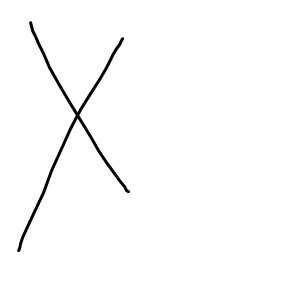

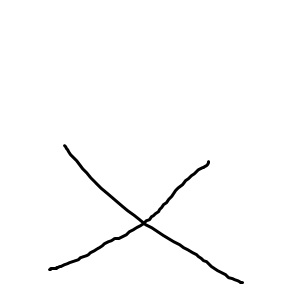

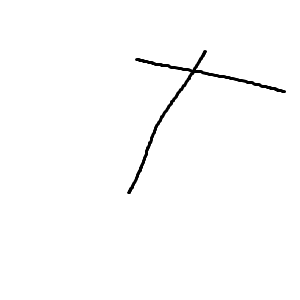

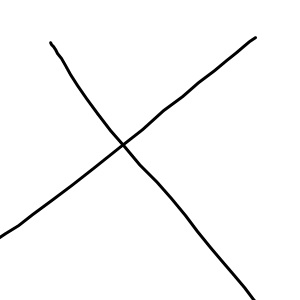

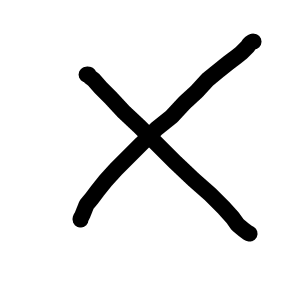

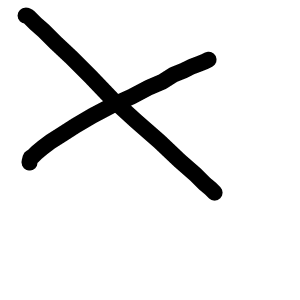

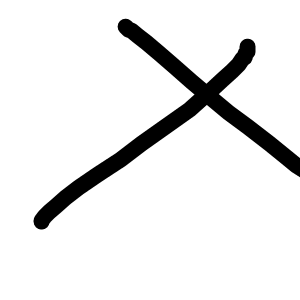

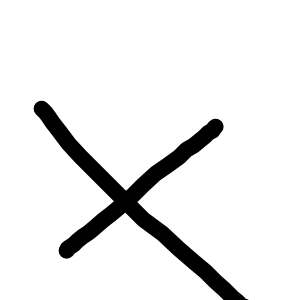

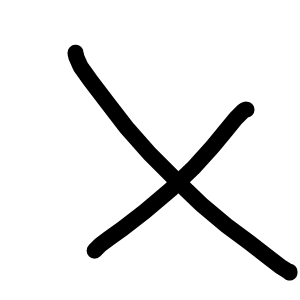

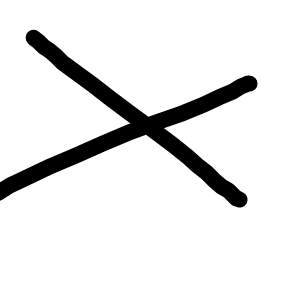

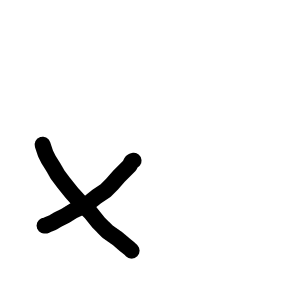

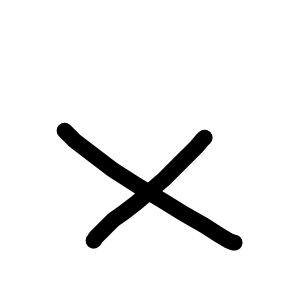

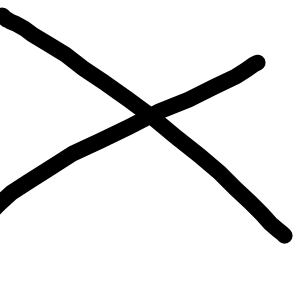

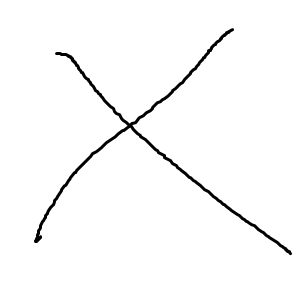

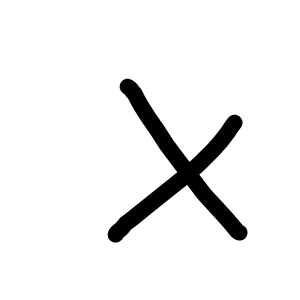

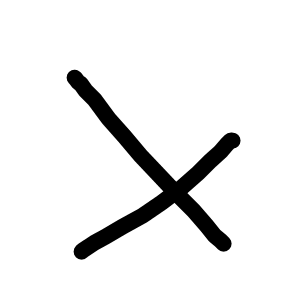

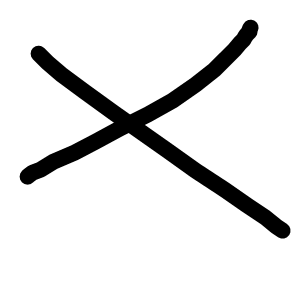

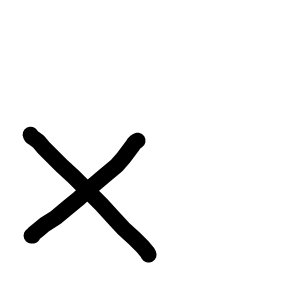

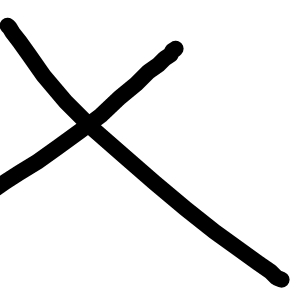

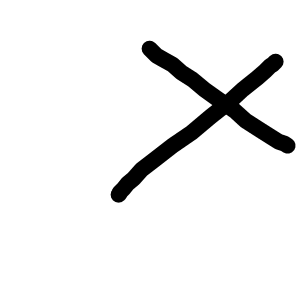

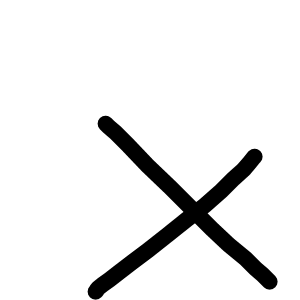

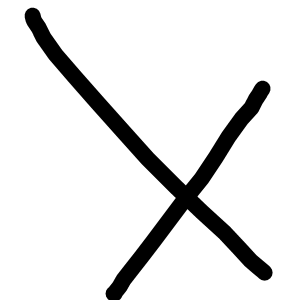

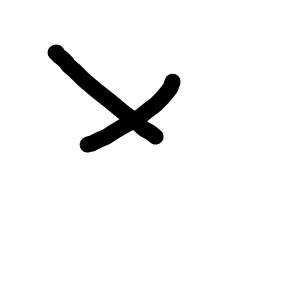

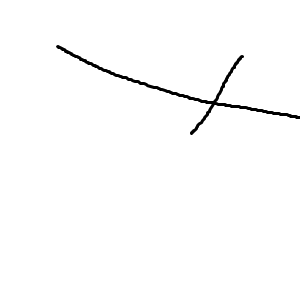

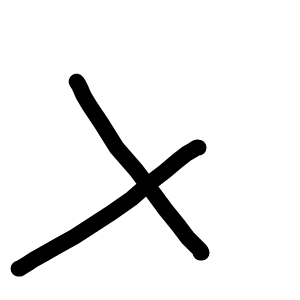

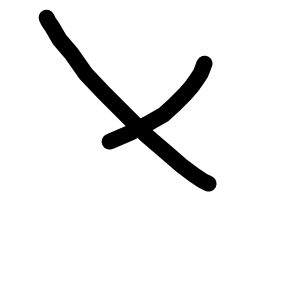

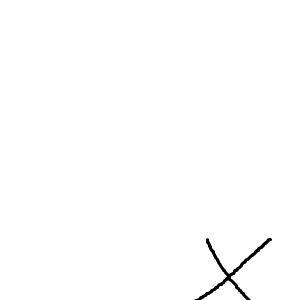

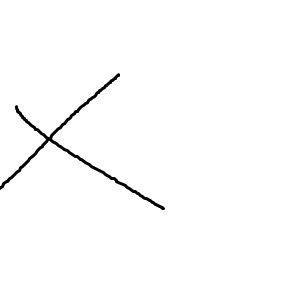

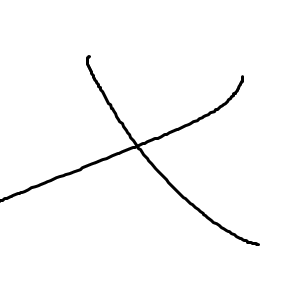

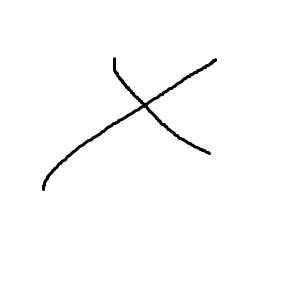

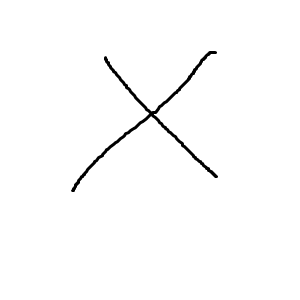

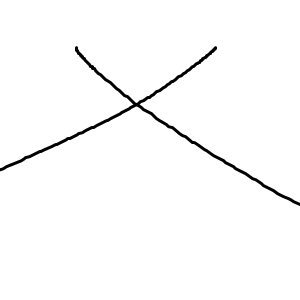

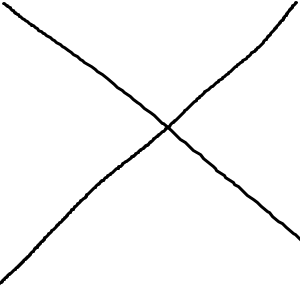

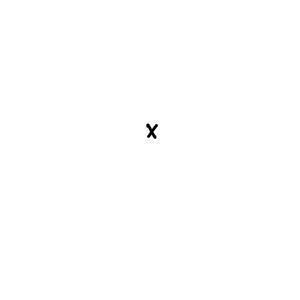

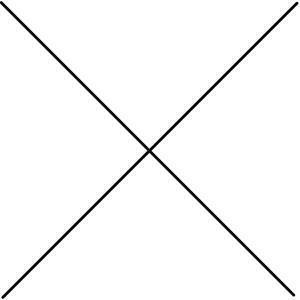

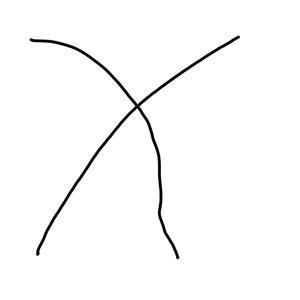

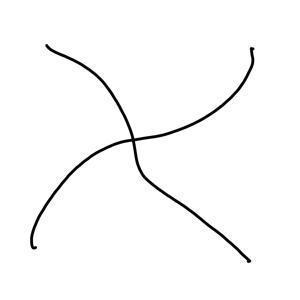

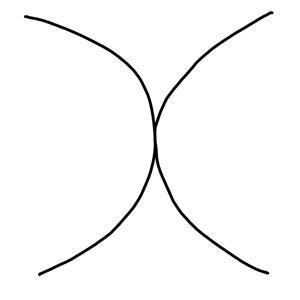

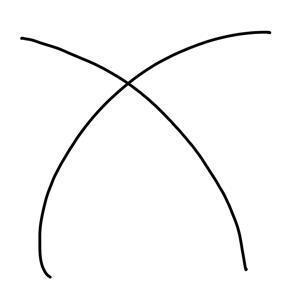

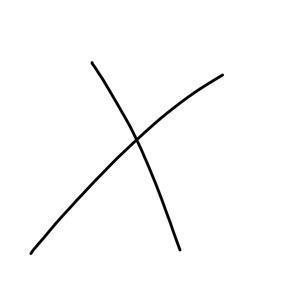

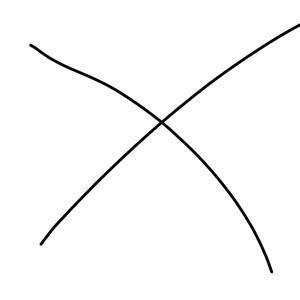

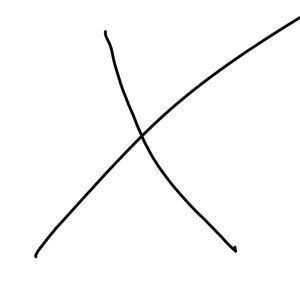

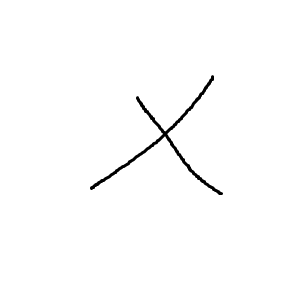

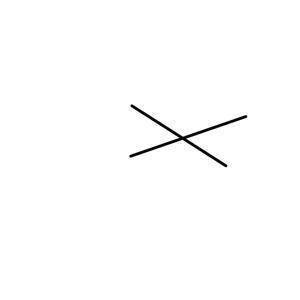

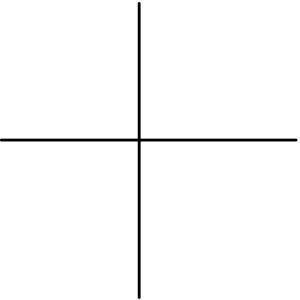

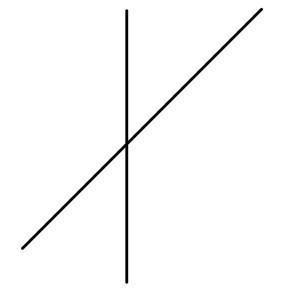

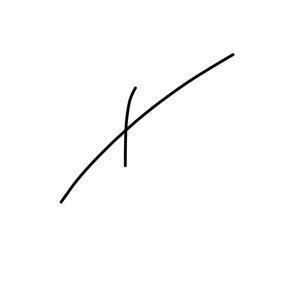

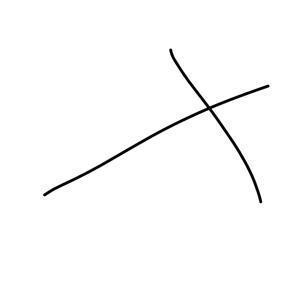

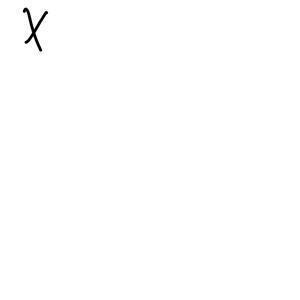

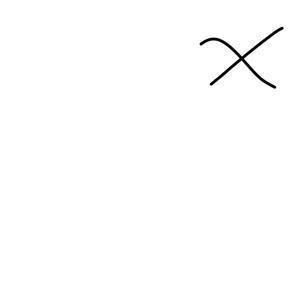

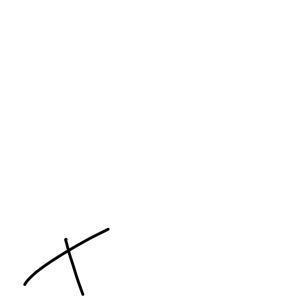

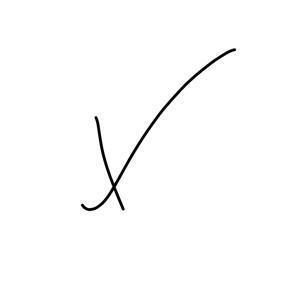

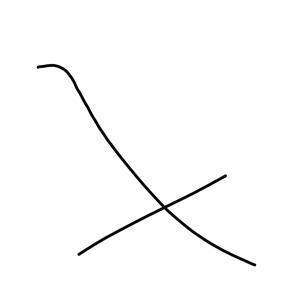

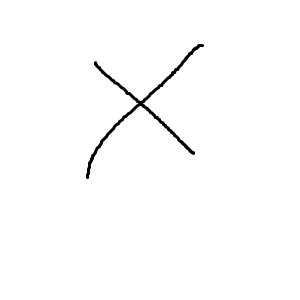

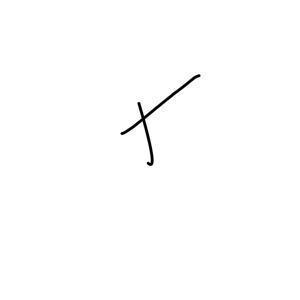

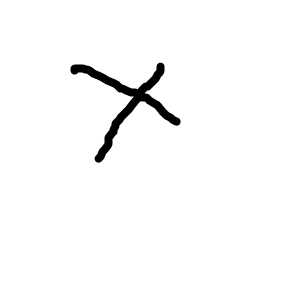

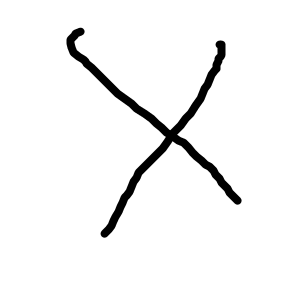

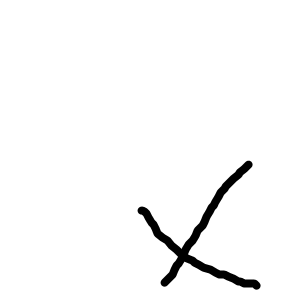

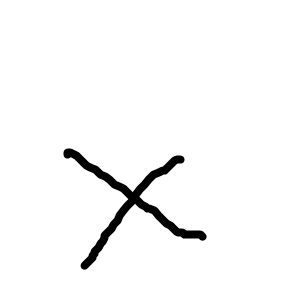

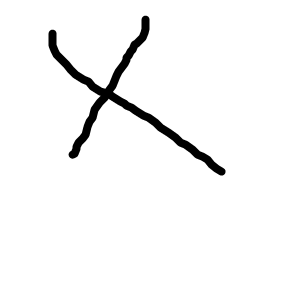

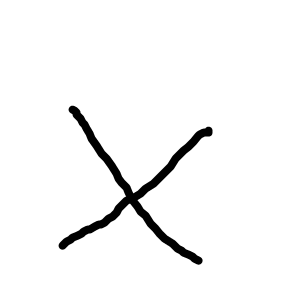

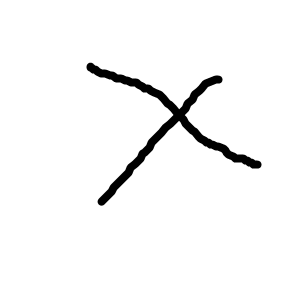

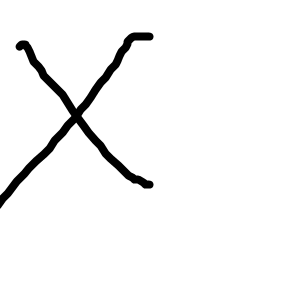

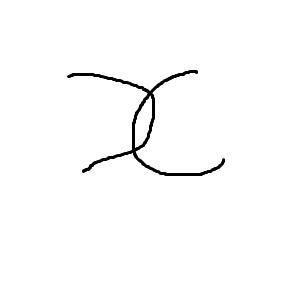

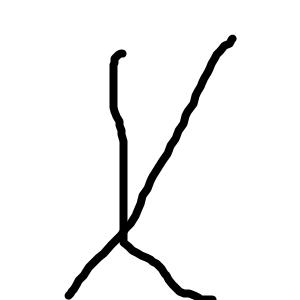

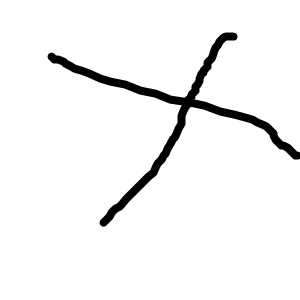

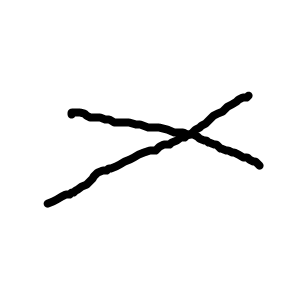

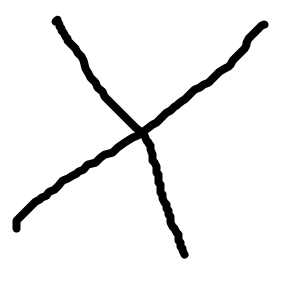

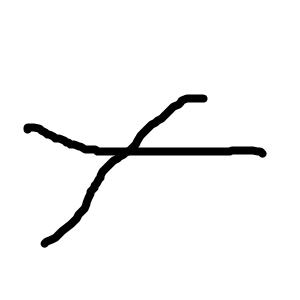

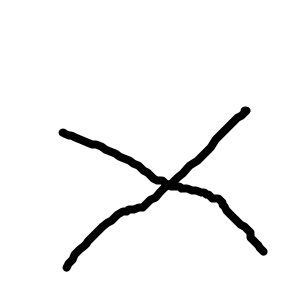

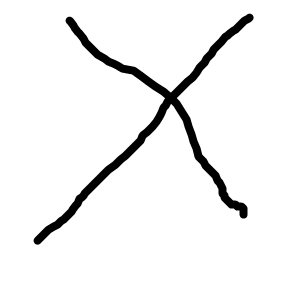

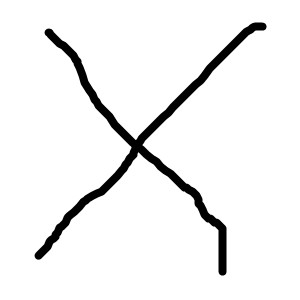

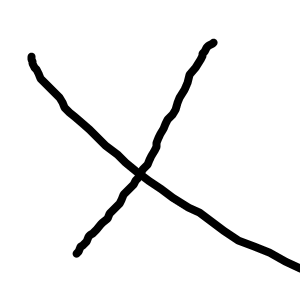

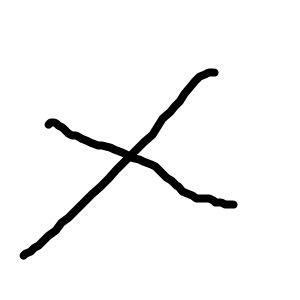

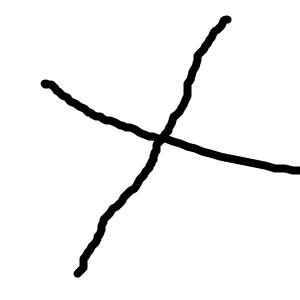

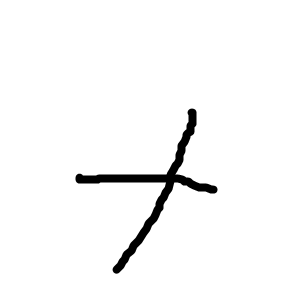

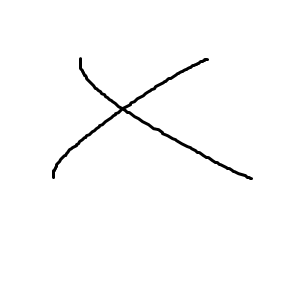

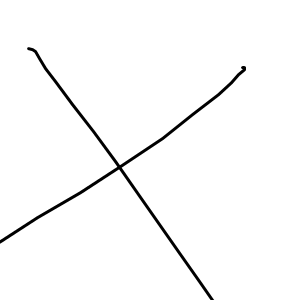

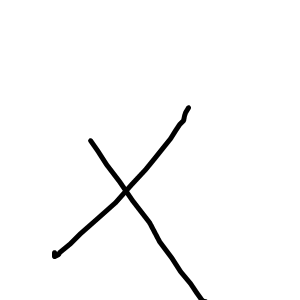

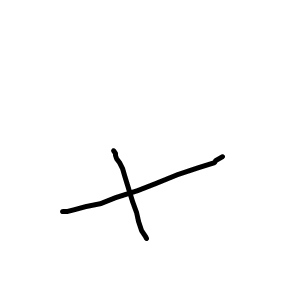

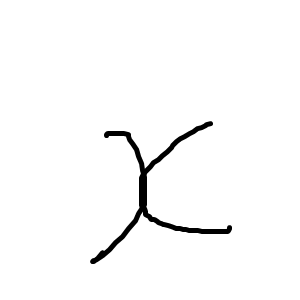

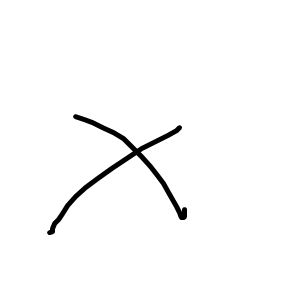

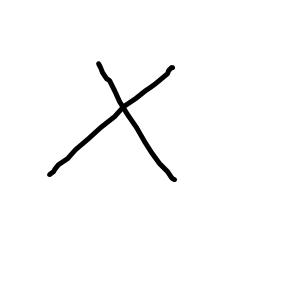

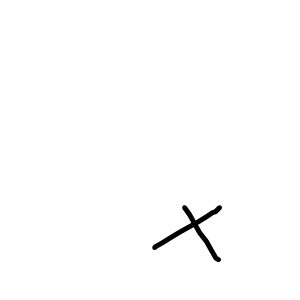

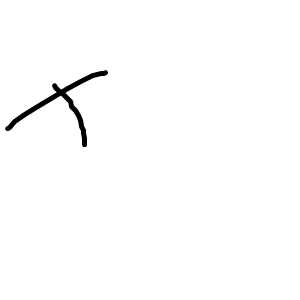

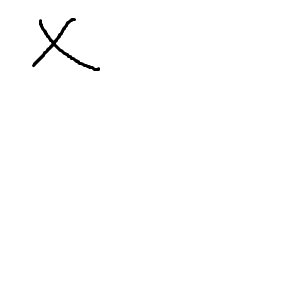

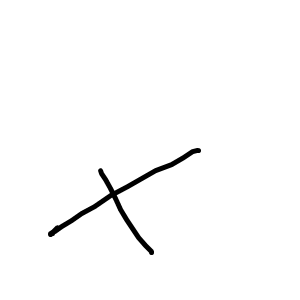

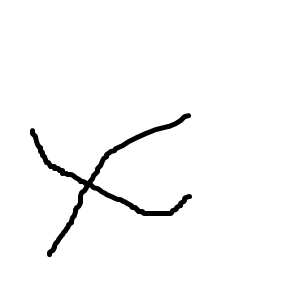

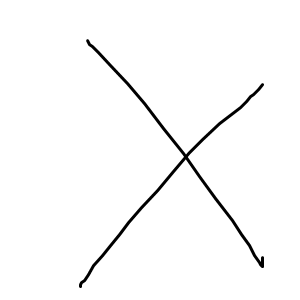

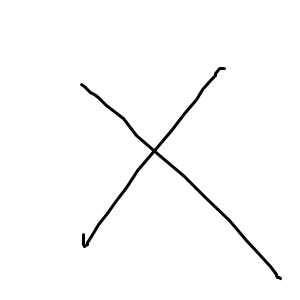

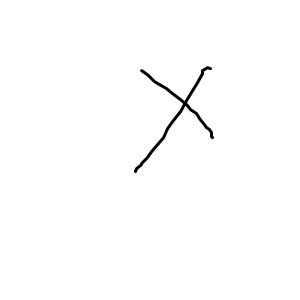

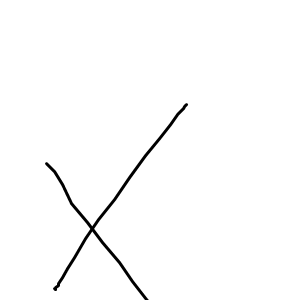

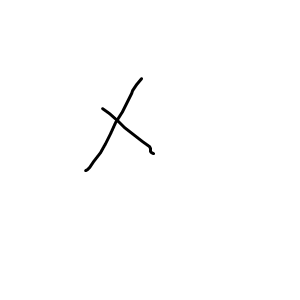

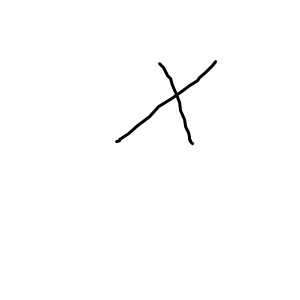

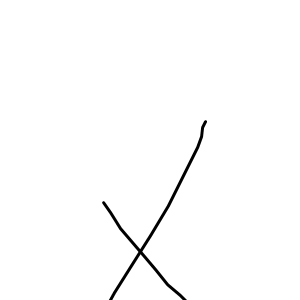

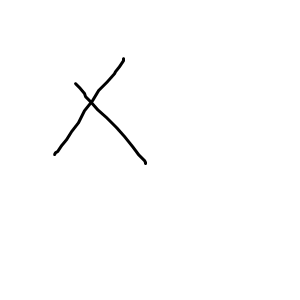

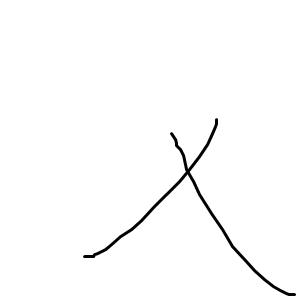

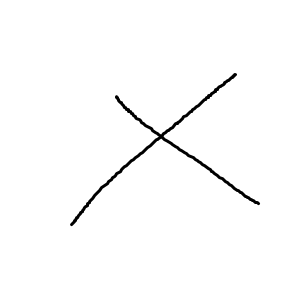

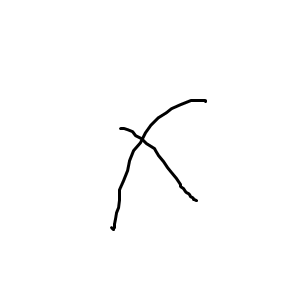

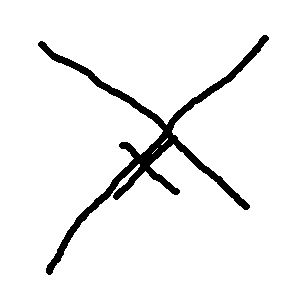

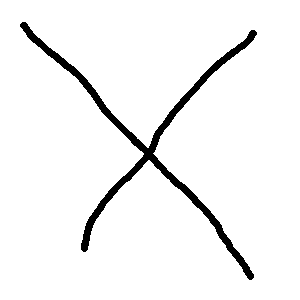

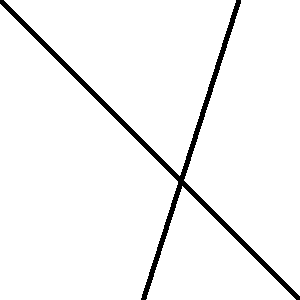

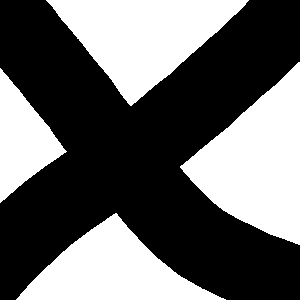

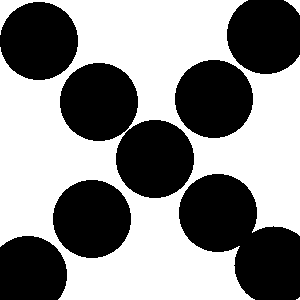

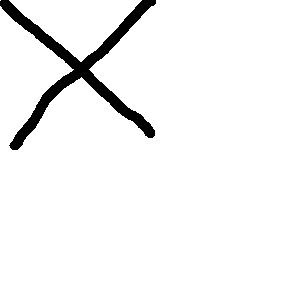

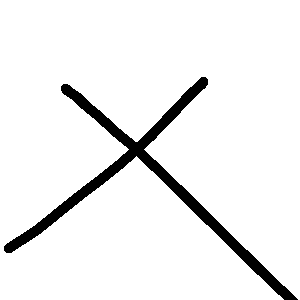

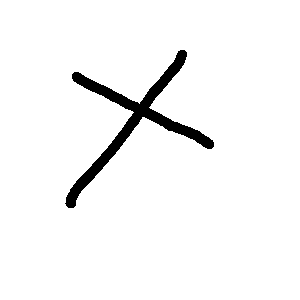

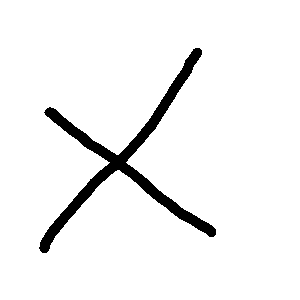

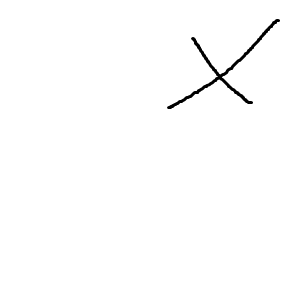

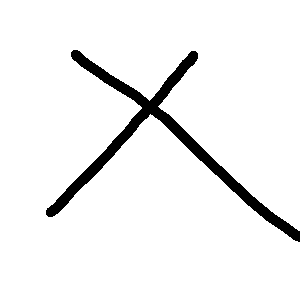

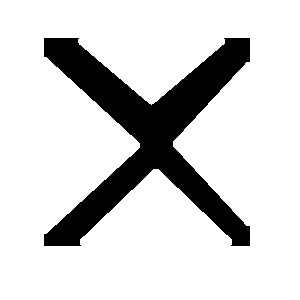

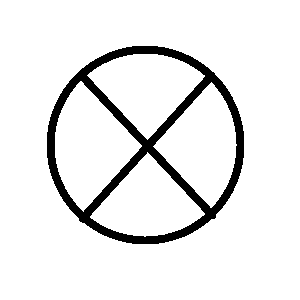

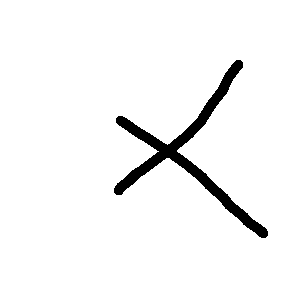

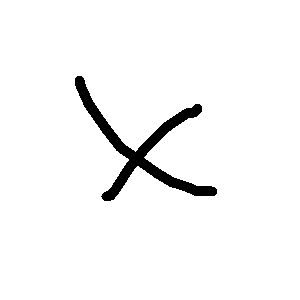

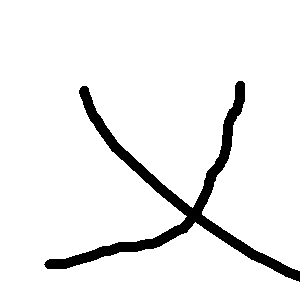

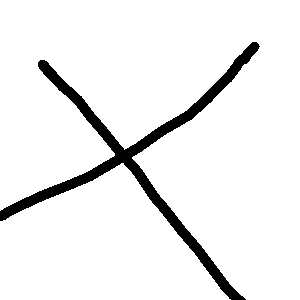

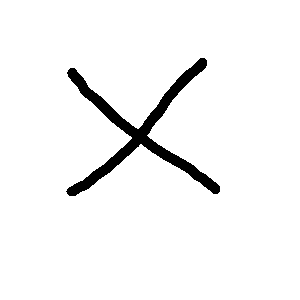

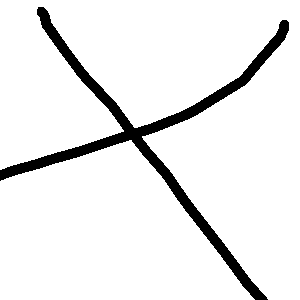

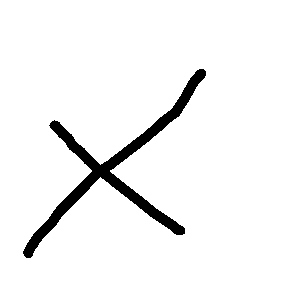

In [8]:
#이미지 불러오기
dir_path =("/content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/DataSet/Dataset/")

for filename in os.listdir(dir_path):
  if filename.endswith((".jpg","png")):
    img_path = Image.open(os.path.join(dir_path, filename))
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:
      cv2_imshow(img)
    else:
      print(f"failed to load image: {img_path}")


                                       file_list_img  Label
0  /content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/Dat...   o_52
1  /content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/Dat...  o_107
2  /content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/Dat...   o_84
3  /content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/Dat...   x_45
4  /content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/Dat...   o_29


  Label  Count
0     o    141
1     x    140


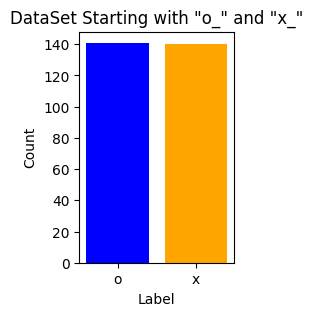

In [13]:
#이미지 경로를 데이터 프레임 형태로

dir_path = "/content/drive/MyDrive/인공지능 실습/IMS_인공지능스터디/DataSet/Dataset/"
path = os.path.join(dir_path, "*")
file_list = glob.glob(path)
file_list_img = [file for file in file_list if file.endswith((".jpg", ".png"))]

# 이미지 파일 경로와 라벨을 데이터프레임으로 변환하는 함수
def proc_img(file_list_img):
    labels = [str(file_list_img[i]).split("/")[-1].split(".")[0] for i in range(len(file_list_img))]

    file_list_img = pd.Series(file_list_img, name='file_list_img').astype(str)
    labels = pd.Series(labels, name='Label')

    # 경로와 라벨 concatenate
    df = pd.concat([file_list_img, labels], axis=1)

    # index 재설정
    df = df.sample(frac=1, random_state=0).reset_index(drop=True)

    return df

df = proc_img(file_list_img)

# "o"와 "x"로 시작하는 파일 개수 세기
count = Counter()
for label in df['Label']:
    if label.startswith('o_'):
        count['o'] += 1
    elif label.startswith('x_'):
        count['x'] += 1

# 결과를 표로 만들기
count_df = pd.DataFrame(list(count.items()), columns=['Label', 'Count'])

# 데이터프레임 출력
print(df.head(5))
print("\n")
print(count_df)

# 결과를 바 그래프로 시각화
plt.figure(figsize=(2, 3))
plt.bar(count_df['Label'], count_df['Count'], color=['blue', 'orange'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('DataSet Starting with "o_" and "x_"')
plt.show()